# Humidity

In [1]:
import matplotlib.pyplot as plt
from typhon import plots

import konrad


plots.styles.use('typhon')

## Fixed relative humidity

By default, konrad will preserve the relative humidity in the atmospheric column.
Internally, this is done by the `FixedRH` component, which will use a given function that presrcibes the vertical distribution of relative humidity.
There are various pre-defined functions in `konrad.humidity`, for exmaple, a vertically uniform humidity distribution.

In [2]:
humidity_model = konrad.humidity.FixedRH(
    rh_func=konrad.humidity.VerticallyUniform(0.1),
)

Next, we can compile and run our RCE simulation

Text(0, 0.5, '$p$ / hPa')

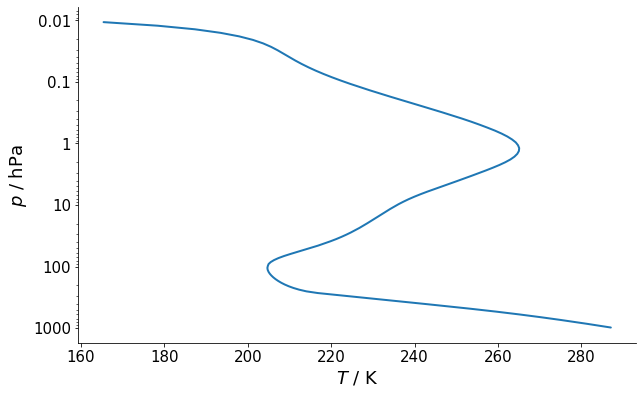

In [3]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(288.),  # Run with a fixed surface temperature.
    humidity=humidity_model,  # Here, we pass the humidity component that we just created
    timestep='12h',  # Set timestep in model time.
    max_duration='100d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")

## Fixed absolute humidity

There is also a special class that will keep the absolute amount of water vapor fixed. This can be used to turn off the water-vapor feedback in a simulation, or, to run a simulation without any water vapor at all.

Text(0, 0.5, '$p$ / hPa')

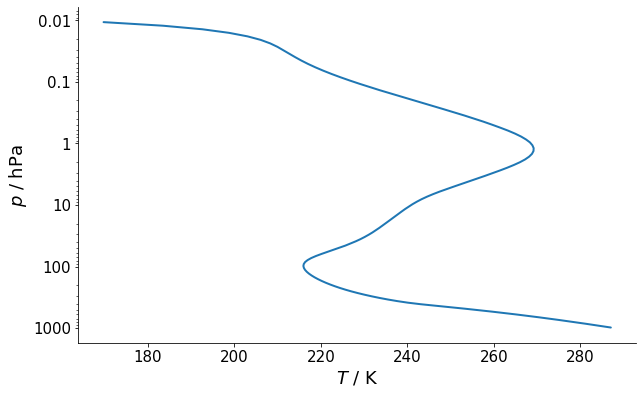

In [4]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

atmosphere["H2O"][:] = 0.0  # Remove all water-vapor from the atmospheric column
humidity_model = konrad.humidity.FixedVMR()  # Preserve the absolute humidity

rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(288.),  # Run with a fixed surface temperature.
    humidity=humidity_model,  # Here, we pass the humidity component that we just created
    timestep='12h',  # Set timestep in model time.
    max_duration='100d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")